## **Desafio Usando as Ações da Apple**

In [1]:
#instalando a biblioteca que nao existe no colab. no colab sempre usar o ! antes
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
#baixando os dados da api do yahoo
df_dados_apple = yf.download('AAPL', start='2022-06-01', end = '2022-12-31')
df_dados_apple

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-01,149.899994,151.740005,147.679993,148.710007,147.245804,74286600
2022-06-02,147.830002,151.270004,146.860001,151.210007,149.721191,72348100
2022-06-03,146.899994,147.970001,144.460007,145.380005,143.948593,88570300
2022-06-06,147.029999,148.570007,144.899994,146.139999,144.701126,71598400
2022-06-07,144.350006,149.000000,144.100006,148.710007,147.245804,67808200
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.959961,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.142456,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.179680,85438400


In [4]:
#renomeando as colunas
df_dados_apple.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fech_Ajust', 'Volume']
df_dados_apple

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume
Date,,,,,,
2022-06-01,149.899994,151.740005,147.679993,148.710007,147.245804,74286600
2022-06-02,147.830002,151.270004,146.860001,151.210007,149.721191,72348100
2022-06-03,146.899994,147.970001,144.460007,145.380005,143.948593,88570300
2022-06-06,147.029999,148.570007,144.899994,146.139999,144.701126,71598400
2022-06-07,144.350006,149.000000,144.100006,148.710007,147.245804,67808200
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.959961,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.142456,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.179680,85438400


In [6]:
#Renomeando a primeira coluna index/axis
df_dados_apple = df_dados_apple.rename_axis('Data')
df_dados_apple

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume
Data,,,,,,
2022-06-01,149.899994,151.740005,147.679993,148.710007,147.245804,74286600
2022-06-02,147.830002,151.270004,146.860001,151.210007,149.721191,72348100
2022-06-03,146.899994,147.970001,144.460007,145.380005,143.948593,88570300
2022-06-06,147.029999,148.570007,144.899994,146.139999,144.701126,71598400
2022-06-07,144.350006,149.000000,144.100006,148.710007,147.245804,67808200
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.959961,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.142456,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.179680,85438400


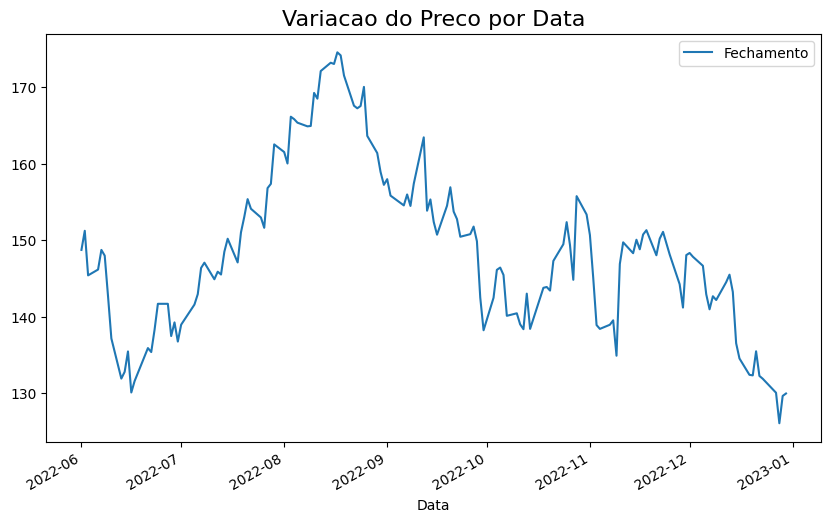

In [9]:
#MatplotLib com Grafico
df_dados_apple['Fechamento'].plot(figsize=(10,6))
plt.title('Variacao do Preco por Data', fontsize=16)
plt.legend(['Fechamento'])


In [10]:
df = df_dados_apple.head(60).copy()

#Convertendo o indice em uma coluna de data
df['Data'] = df.index

#convertendo datas para o formato numerico matplotlib
#Isso é necessario para que o MatplotLib possa plotar as datas corretamente no grafico
#funcao mdates.date2num metodo que manipula data q ira converter para um numero
df['Data'] = df['Data'].apply(mdates.date2num)

df

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume,Data
Data,,,,,,,
2022-06-01,149.899994,151.740005,147.679993,148.710007,147.245804,74286600,19144.0
2022-06-02,147.830002,151.270004,146.860001,151.210007,149.721191,72348100,19145.0
2022-06-03,146.899994,147.970001,144.460007,145.380005,143.948593,88570300,19146.0
2022-06-06,147.029999,148.570007,144.899994,146.139999,144.701126,71598400,19149.0
2022-06-07,144.350006,149.000000,144.100006,148.710007,147.245804,67808200,19150.0
2022-06-08,148.580002,149.869995,147.460007,147.960007,146.503189,53950200,19151.0
2022-06-09,147.080002,147.949997,142.529999,142.639999,141.235596,69473000,19152.0
2022-06-10,140.279999,140.759995,137.059998,137.130005,135.779846,91437900,19153.0
2022-06-13,132.869995,135.199997,131.440002,131.880005,130.581512,122207100,19156.0


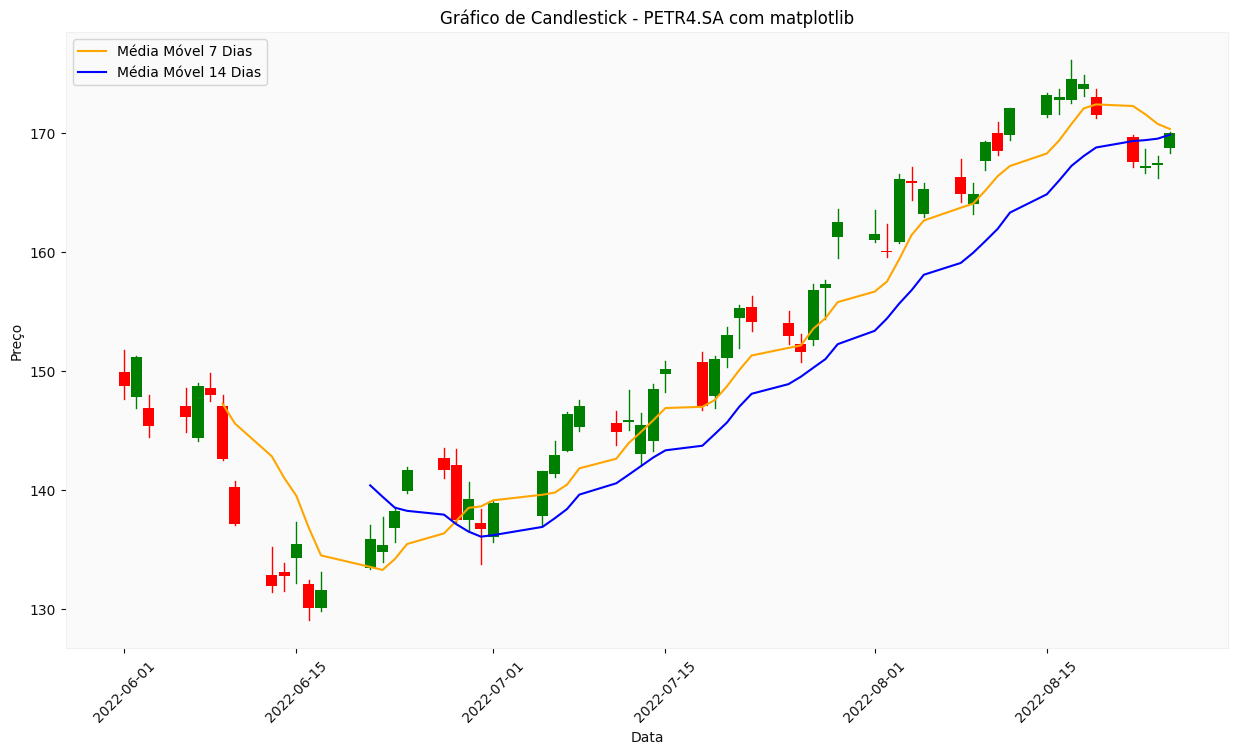

In [20]:
#Desenvolvendo um gráfico de velas - explicando passo a passo como funciona o desenvolvimento de um grafico de velas. Mais abaixo usaremos uma API q fará isso de uma forma mais simples

#plotando o fundo de tela e o tamanho
fig, ax = plt.subplots(figsize=(15,8))

# Vamos definir a largura dos candles no gráfico
width = 0.9


for i in range(len(df)):
  # Determinando a cor do candle
  # Se o preço de fechamento for maior que o de abertura, o candle é verde (a ação valorizou nesse dia).
  # Se for menor, o candle é vermelho (a ação desvalorizou).
  if df['Fechamento'].iloc[i] > df['Abertura'].iloc[i]:
      color= 'green'
  else:
      color='red'


    # Desenhando a linha vertical do candle (mecha)
    # Essa linha mostra os preços máximo (topo da linha) e mínimo (base da linha) do dia.
    # Usamos `ax.plot` para desenhar uma linha vertical.
    # [df['Data'].iloc[i], df['Data'].iloc[i]] define o ponto x da linha (a data), e [df['Mínimo'].iloc[i], df['Máximo'].iloc[i]] define a altura da linha.
    #prestar atencao sempre na identação!!!!!!!!
  ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
          [df['Minimo'].iloc[i], df['Maximo'].iloc[i]],
          color = color,
          linewidth=1 )

  #desenhando as velas do grafico
  ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Abertura'].iloc[i], df['Fechamento'].iloc[i])),
                               width,
                               abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]),
                               facecolor=color))

#Dataframe com as medias
df['MA7'] = df['Fechamento'].rolling(window=7).mean()
df['MA14'] = df['Fechamento'].rolling(window=14).mean()

# Plotando as médias móveis
ax.plot(df['Data'], df['MA7'], color='orange', label='Média Móvel 7 Dias')  # Média de 7 dias
ax.plot(df['Data'], df['MA14'], color='blue', label='Média Móvel 14 Dias')  # Média de 14 dias
# Adicionando legendas para as médias móveis
ax.legend()

# Formatando o eixo x para mostrar as datas
# Configuramos o formato da data e a rotação para melhor legibilidade
ax.xaxis_date() #O método xaxis_date() é usado para dizer ao Matplotlib que as datas estão sendo usadas no eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Adicionando título e rótulos para os eixos x e y
plt.title("Gráfico de Candlestick - PETR4.SA com matplotlib")
plt.xlabel("Data")
plt.ylabel("Preço")

# Adicionando uma grade para facilitar a visualização dos valores
plt.grid(False)

# Exibindo o gráfico
plt.show()

In [24]:
##Deixando o Grafico interativo
# Criando subplots
'''
"Primeiro, criamos uma figura que conterá nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização.
Aqui, teremos dois subplots: um para o gráfico de candlestick e outro para o volume de transações."

'''
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

'''
"No gráfico de candlestick, cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura."
'''
# Adicionando o gráfico de candlestick
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Abertura'],
                             high=df['Maximo'],
                             low=df['Minimo'],
                             close=df['Fechamento'],
                             name='Candlestick'),
                             row=1, col=1)


# Adicionando as médias móveis
# Adicionamos também médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines+markers',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines+markers',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

# Adicionando o gráfico de barras para o volume
# Em seguida, criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=df.index,
                     y=df['Volume'],
                     name='Volume'),
                     row=2, col=1)

# Atualizando layout
#Finalmente, configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível.
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider
                  width=1100, height=600)

# Mostrando o gráfico
fig.show()

In [12]:
#baixando os dados da api do yahoo
df_dados_apple = yf.download('AAPL', start='2022-06-01', end = '2022-12-31')
df_dados_apple

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-01,149.899994,151.740005,147.679993,148.710007,147.245804,74286600
2022-06-02,147.830002,151.270004,146.860001,151.210007,149.721191,72348100
2022-06-03,146.899994,147.970001,144.460007,145.380005,143.948593,88570300
2022-06-06,147.029999,148.570007,144.899994,146.139999,144.701126,71598400
2022-06-07,144.350006,149.000000,144.100006,148.710007,147.245804,67808200
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.959961,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.142456,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.179680,85438400


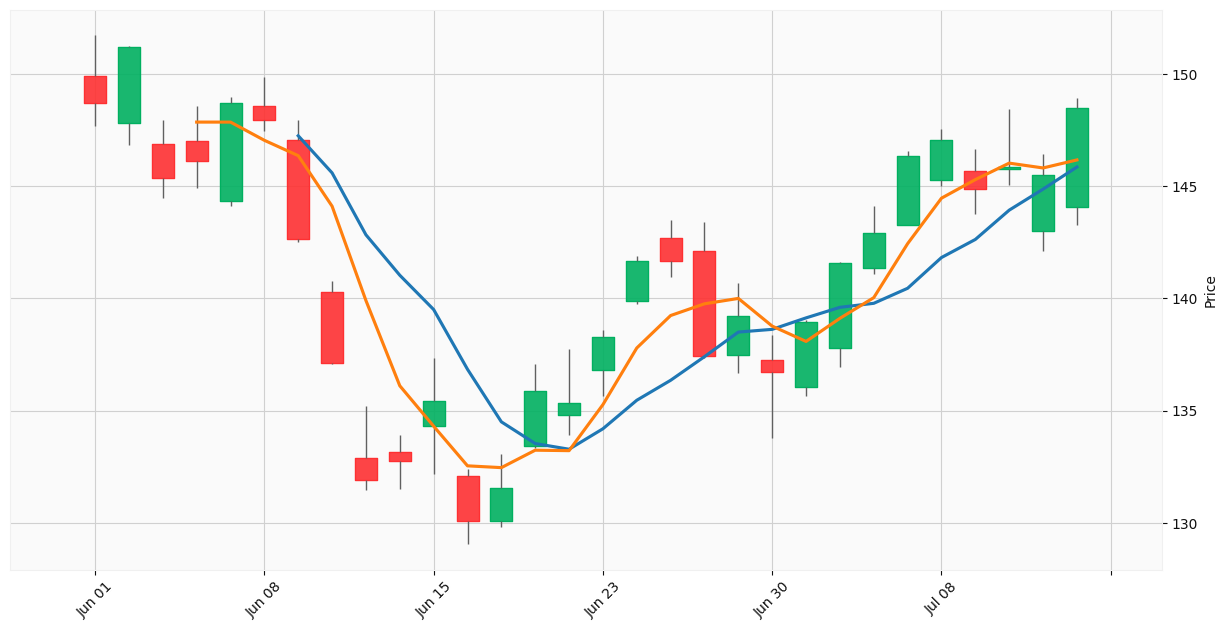

In [16]:
#Utilizando a API mplfinance - Todos o bloco anterior (tirando o bloco do interativo) se resumem a essa linha de codigo.
mpf.plot(df_dados_apple.head(30), type='candle', figsize = (16,8), volume=False, mav=(7,4), style='yahoo')